In [148]:
#import libraries
import os
from time import time
import numpy as np 
import pandas as pd 
import warnings
import itertools
import math
warnings.filterwarnings(action='ignore')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from datetime import timedelta
from statsmodels.tsa.seasonal import seasonal_decompose
%matplotlib inline
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
plt.rcParams.update({'figure.figsize': (15,4), 'figure.dpi': 200,})
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [71]:
# directory inclusion
dir_path = r"co2_emission\data\modified_19_20_21"
dir_list = os.listdir(dir_path)
dir_list

['Brazil.csv',
 'China.csv',
 'EU27 & UK.csv',
 'France.csv',
 'Germany.csv',
 'India.csv',
 'Italy.csv',
 'Japan.csv',
 'ROW.csv',
 'Russia.csv',
 'Spain.csv',
 'UK.csv',
 'US.csv',
 'WORLD.csv']

In [72]:
#import data of one country

path = os.path.join(dir_path+"\\",dir_list[0])
data = pd.read_csv(path,parse_dates=['Date'],dayfirst=True,)

data.index = data['Date']
#remove null columns
data.dropna(axis=1, how='any',inplace=True)

#display data
data

,Date,Power,Industry,Ground Transport,Residential,Domestic Aviation,International Aviation
Date,,,,,,,
2019-01-01,2019-01-01,0.108768,0.248140,0.201663,0.098452,0.023750,0.018398
2019-01-02,2019-01-02,0.123603,0.281984,0.341199,0.098452,0.032905,0.019761
2019-01-03,2019-01-03,0.121381,0.276915,0.418676,0.098452,0.033383,0.020915
2019-01-04,2019-01-04,0.111488,0.254346,0.443308,0.098452,0.032854,0.020518
2019-01-05,2019-01-05,0.118738,0.270886,0.371087,0.098452,0.031206,0.022138
...,...,...,...,...,...,...,...
2021-12-27,2021-12-27,0.219429,0.243593,0.442156,0.098452,0.037619,0.012932
2021-12-28,2021-12-28,0.231470,0.256959,0.443199,0.098452,0.034849,0.012084
2021-12-29,2021-12-29,0.225740,0.250599,0.438012,0.098452,0.034601,0.010744


In [73]:
data.dtypes
data.isna().sum()

Date                      datetime64[ns]
Power                            float64
Industry                         float64
Ground Transport                 float64
Residential                      float64
Domestic Aviation                float64
International Aviation           float64
dtype: object

Date                      0
Power                     0
Industry                  0
Ground Transport          0
Residential               0
Domestic Aviation         0
International Aviation    0
dtype: int64

In [74]:
#no of dates
Initial_date = data['Date'].iloc[0]
End_date = data['Date'].iloc[-1];

End_date
(End_date-Initial_date).days+1

Timestamp('2021-12-31 00:00:00')

1096

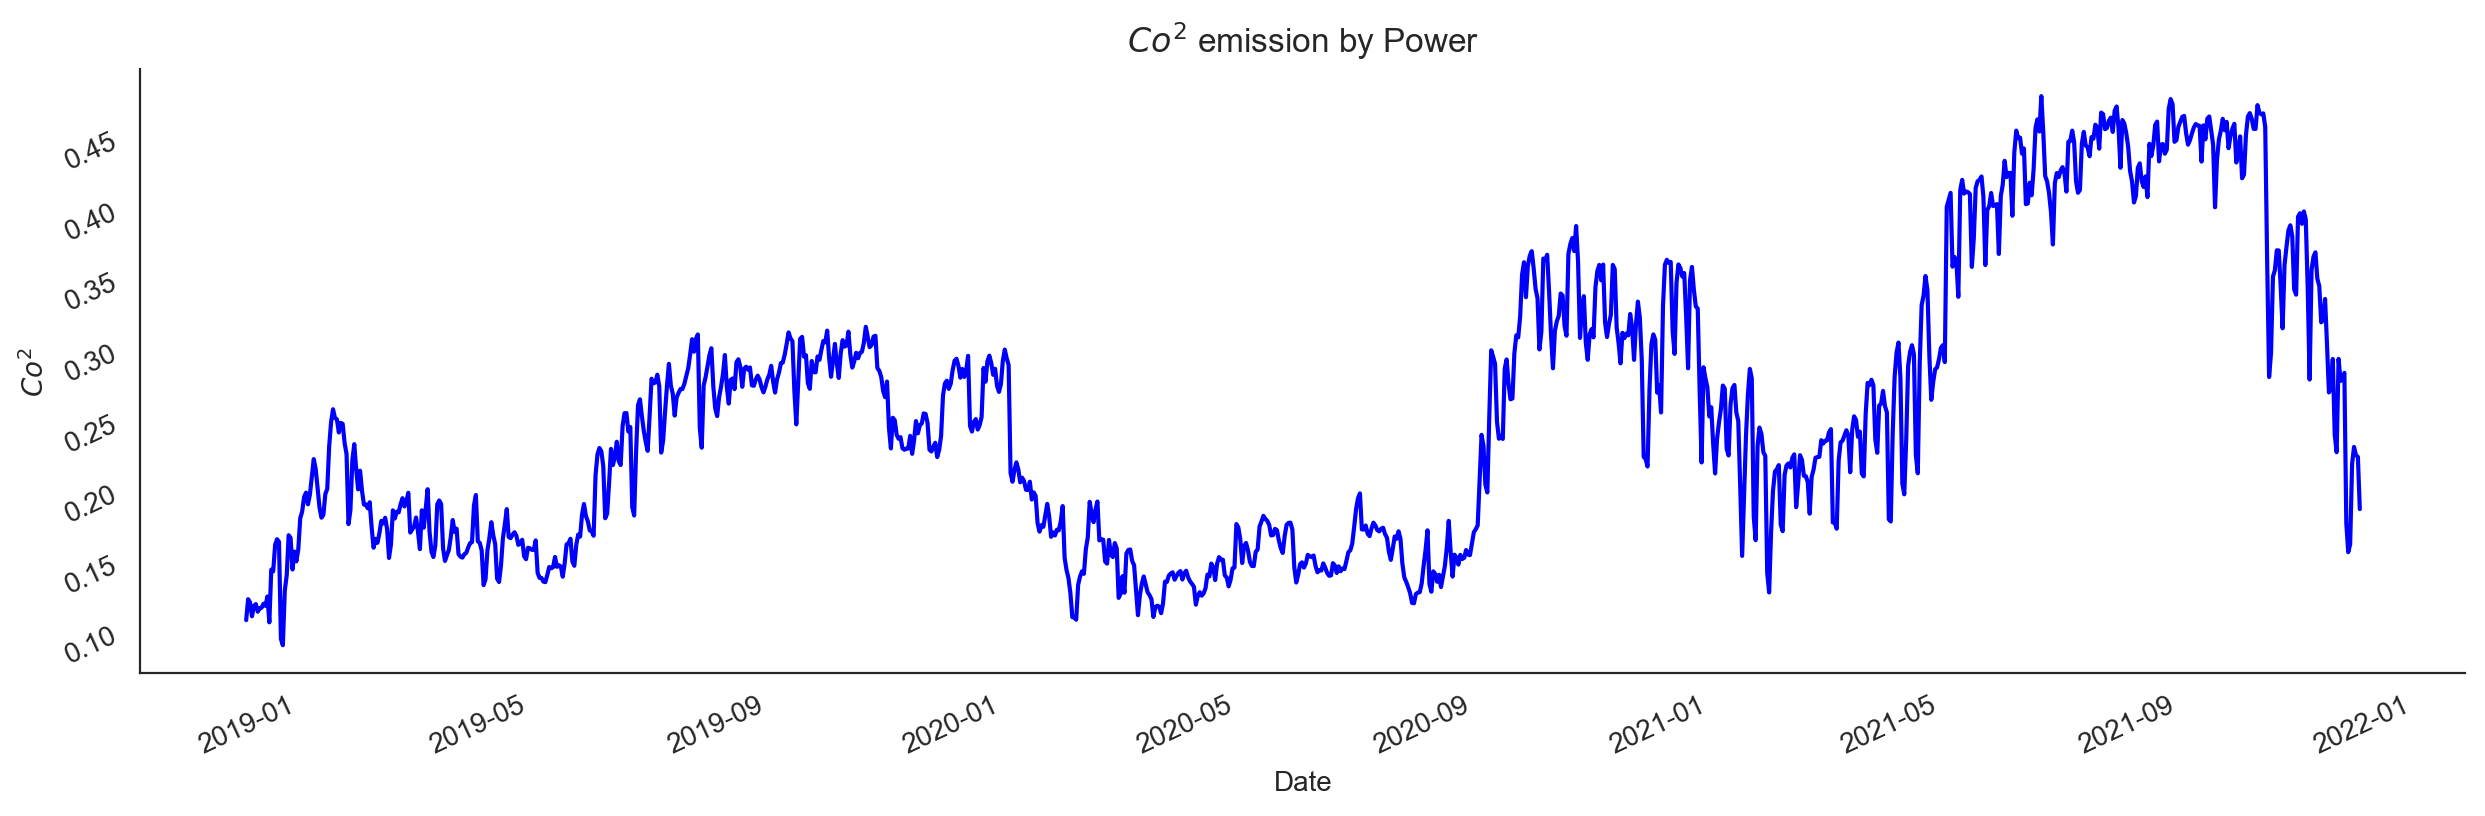

In [75]:
X = data['Date']; Y = data['Power']

#plot
sns.set_style("white")
ax = sns.lineplot(x="Date", y="Power", data=data, color='b');
ax.tick_params(rotation=25);
sns.despine()
plt.ylabel('$Co^2$');
plt.xlabel('Date');
plt.title('$Co^2$ emission by Power');
plt.show();

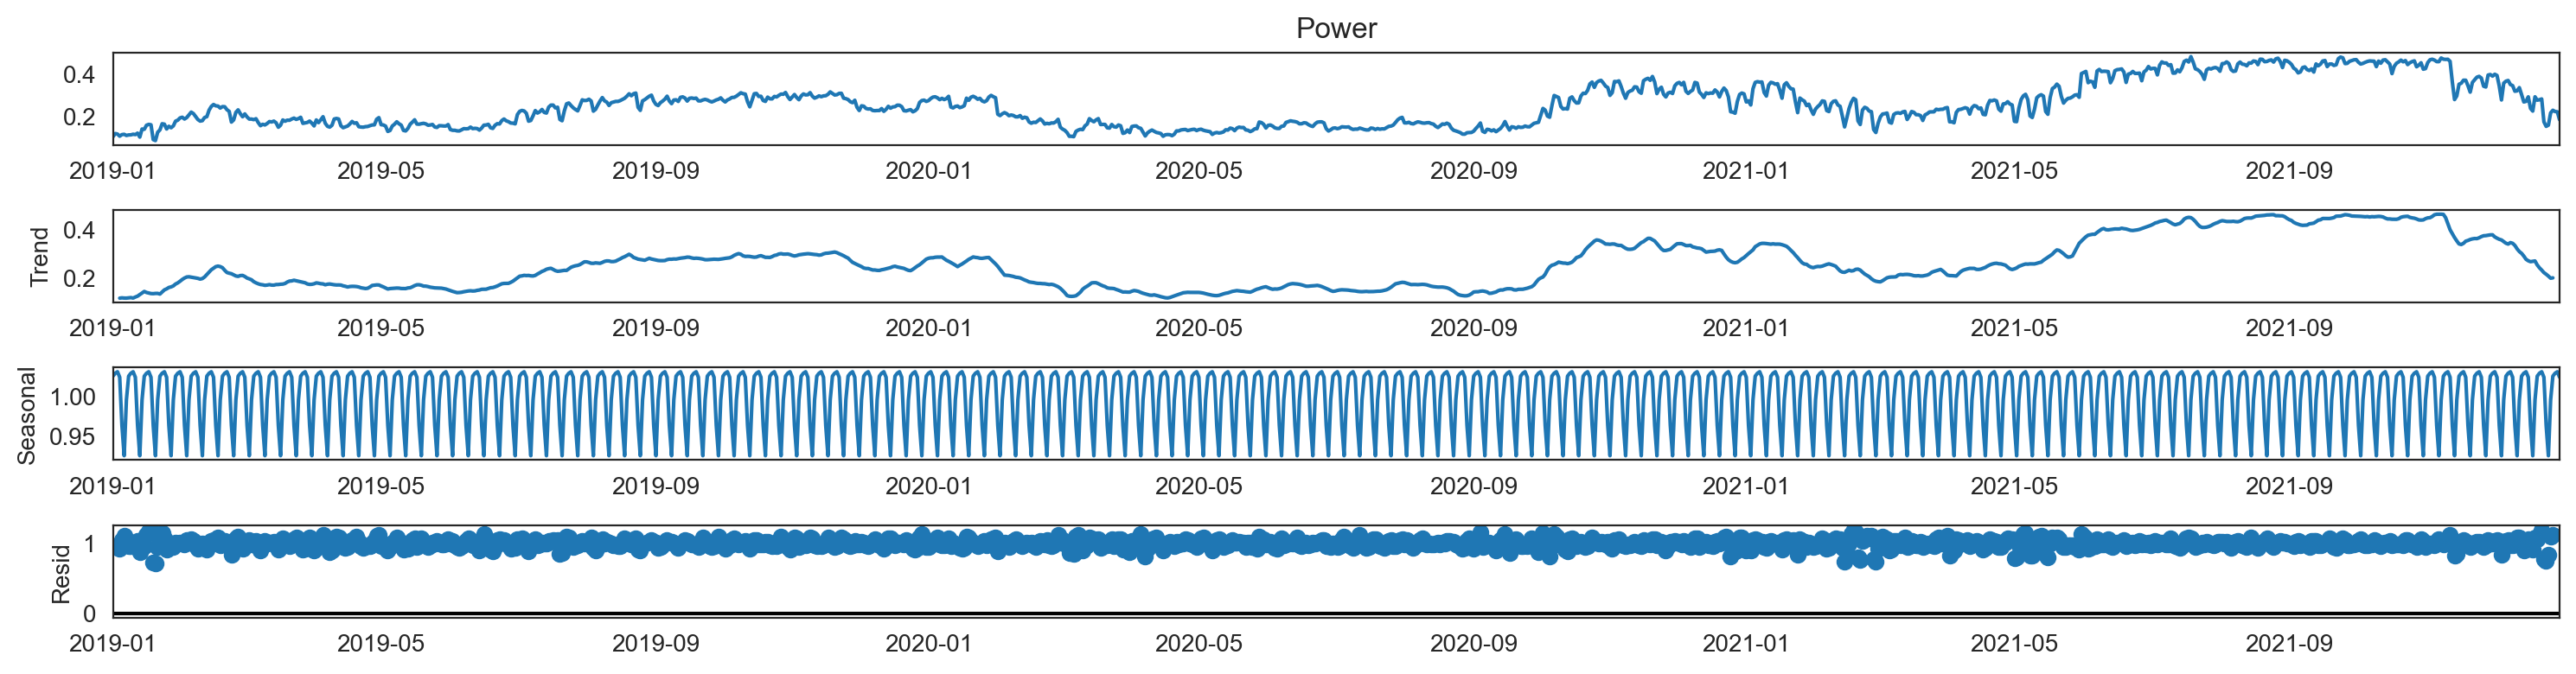

In [76]:
# data decompose for seasonlity
decompose_data = seasonal_decompose(data['Power'], model="multiplicative")
decompose_data.plot();

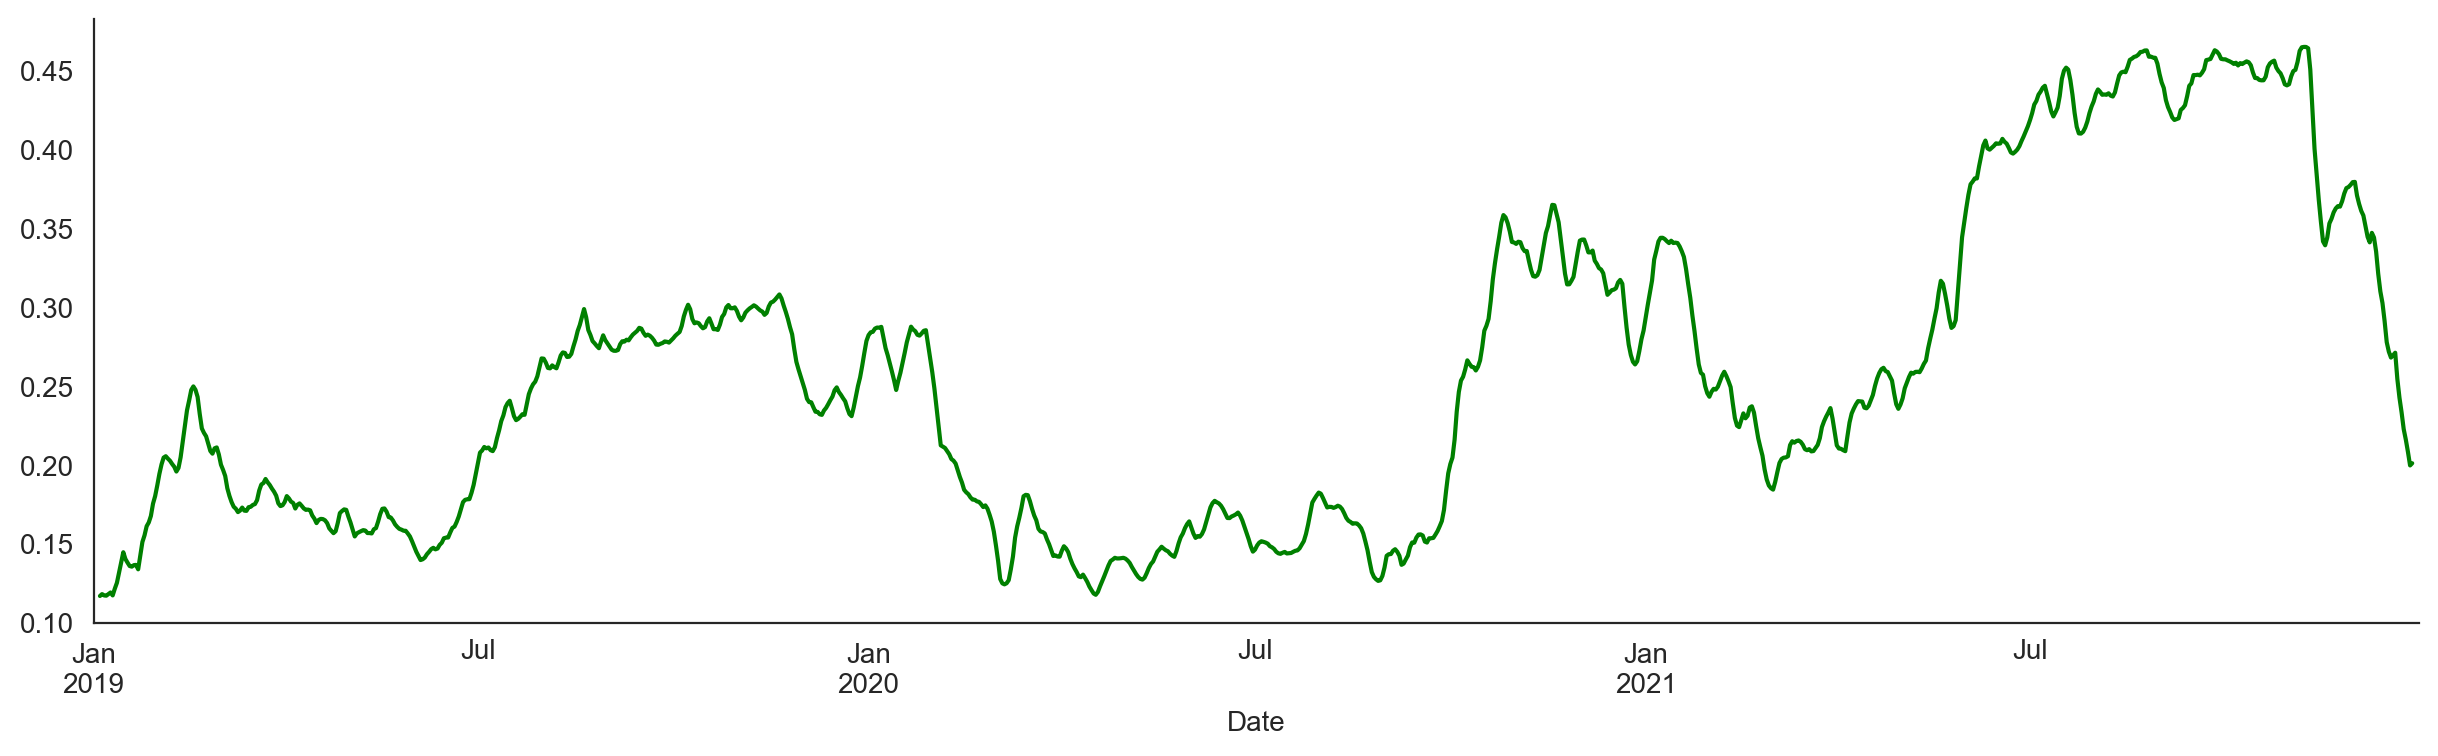

In [77]:
#trend
seasonality=decompose_data.trend
seasonality.plot(color='green');
sns.despine();

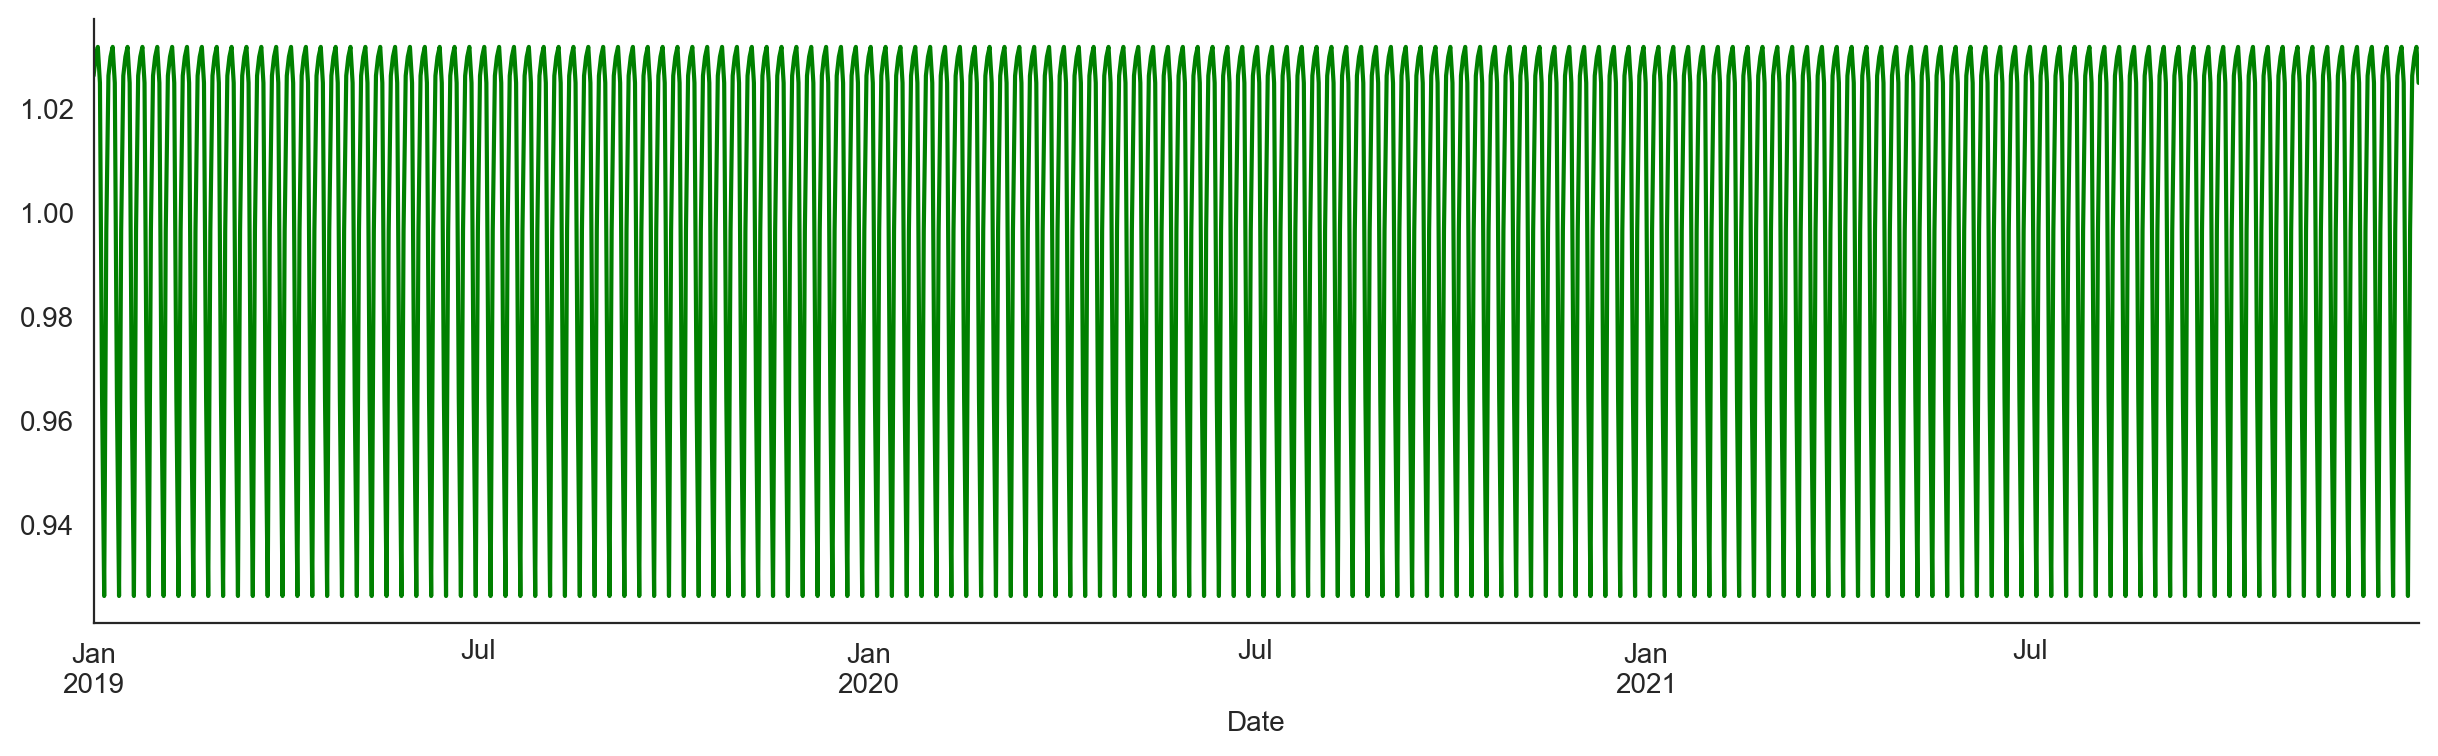

In [78]:
#Seasonality
seasonality=decompose_data.seasonal
seasonality.plot(color='green');
sns.despine();

In [79]:
dftest = adfuller(data.Power, autolag = 'AIC')
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -2.17993859225942
2. P-Value :  0.21360698684775348
3. Num Of Lags :  21
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 1074
5. Critical Values :
	 1% :  -3.4364533503600962
	 5% :  -2.864234857527328
	 10% :  -2.568204837482531


In [80]:
Power_diff = data['Power'] - data['Power'].shift(12)
data.head()
# adfuller(Power_diff)
# Power_diff.plot(color="r")
# sns.despine()
first_diff = data["Power"].diff()[1:]
first_diff

,Date,Power,Industry,Ground Transport,Residential,Domestic Aviation,International Aviation
Date,,,,,,,
2019-01-01,2019-01-01,0.108768,0.248140,0.201663,0.098452,0.023750,0.018398
2019-01-02,2019-01-02,0.123603,0.281984,0.341199,0.098452,0.032905,0.019761
2019-01-03,2019-01-03,0.121381,0.276915,0.418676,0.098452,0.033383,0.020915
2019-01-04,2019-01-04,0.111488,0.254346,0.443308,0.098452,0.032854,0.020518
2019-01-05,2019-01-05,0.118738,0.270886,0.371087,0.098452,0.031206,0.022138


Date
2019-01-02    0.014835
2019-01-03   -0.002222
2019-01-04   -0.009893
2019-01-05    0.007250
2019-01-06    0.001373
                ...   
2021-12-27    0.056900
2021-12-28    0.012041
2021-12-29   -0.005730
2021-12-30   -0.001366
2021-12-31   -0.036968
Name: Power, Length: 1095, dtype: float64

<BarContainer object of 30 artists>

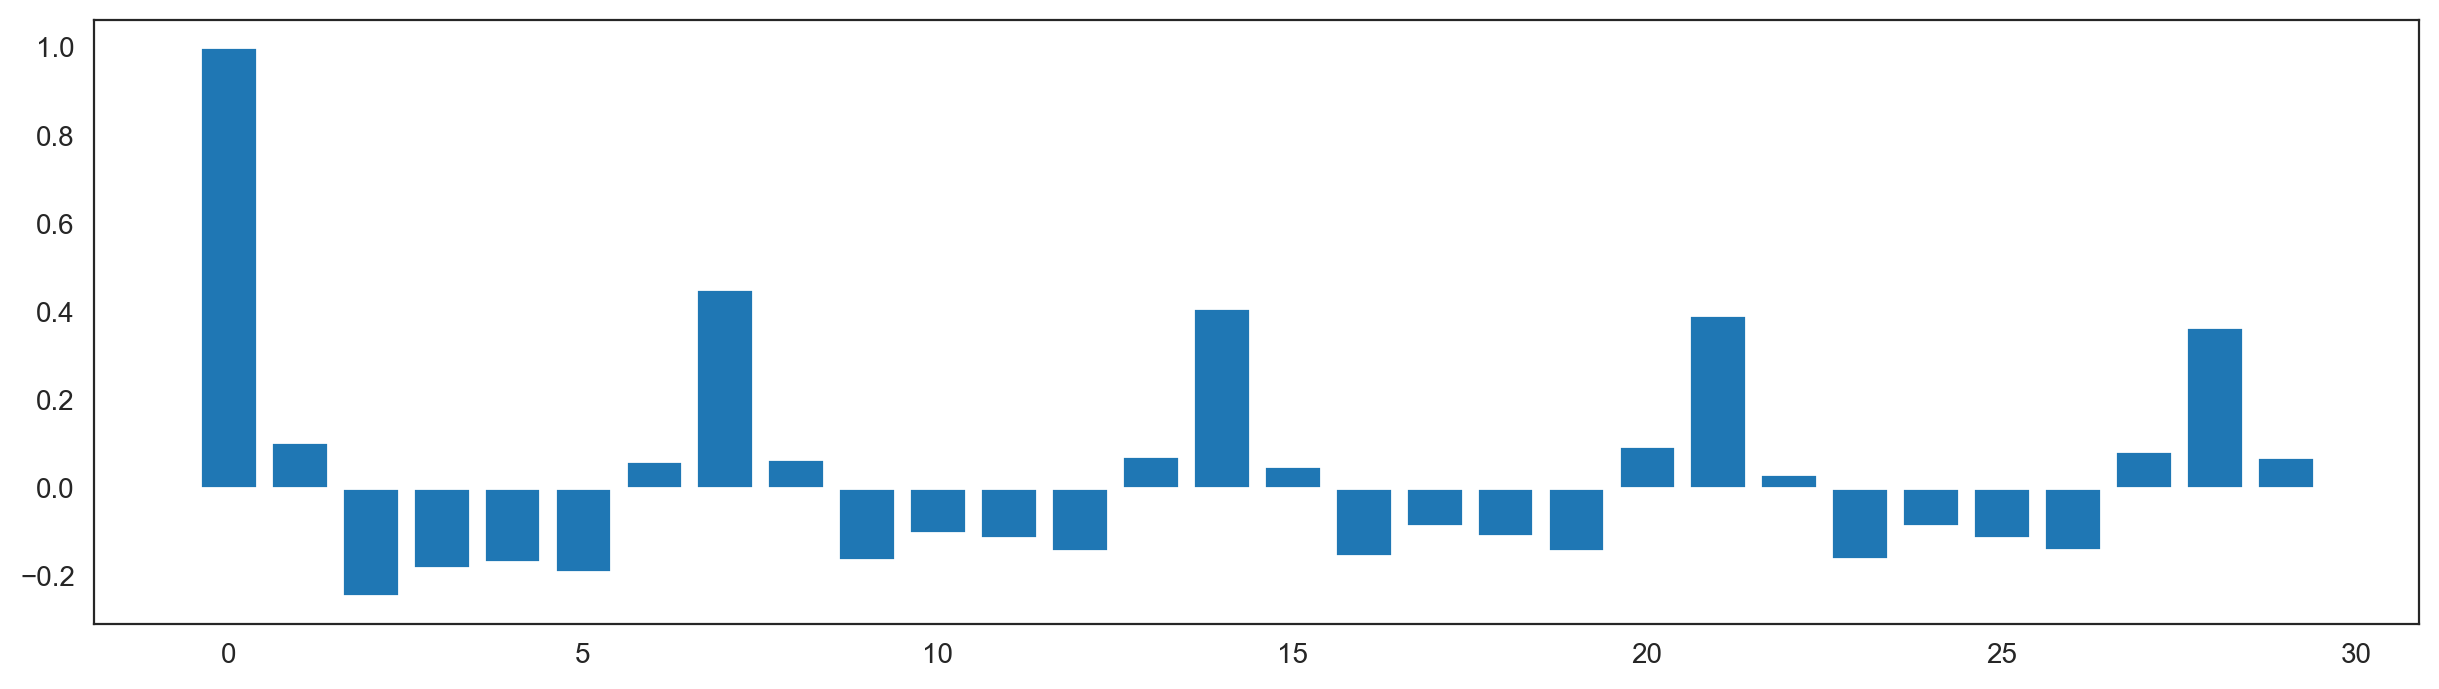

In [81]:
##ACF
acf_vals = acf(first_diff)
num_lags = 30
plt.bar(range(num_lags), acf_vals[:num_lags])

<BarContainer object of 30 artists>

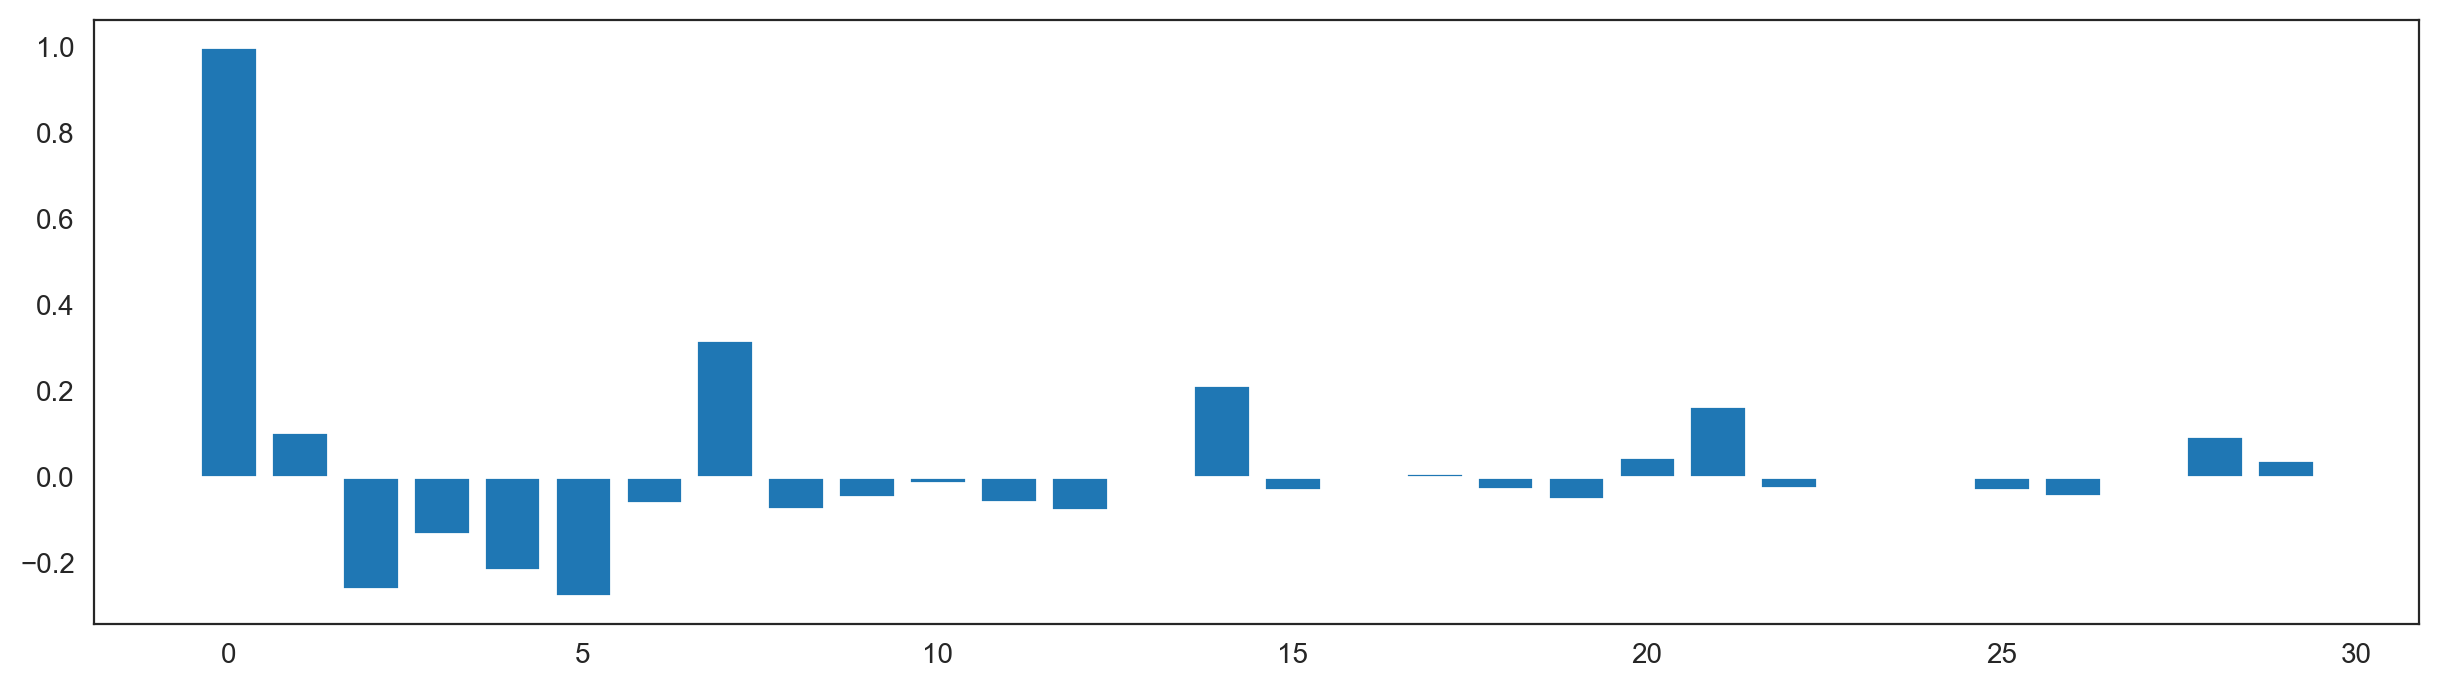

In [82]:
pacf_vals = pacf(first_diff)
num_lags = 30
plt.bar(range(num_lags), pacf_vals[:num_lags])

In [83]:
train_size = int(len(data.Power) * 0.9)
test_size = len(data.Power) - train_size

# train_data = data[["Power"]][0:train_size], 
# test_data = data[["Power"]][train_size:len(data.Power):]

train_data = pd.DataFrame(data.Power[0:train_size])
test_data = pd.DataFrame(data.Power[train_size:len(data.Power):])
train_data.index = pd.DatetimeIndex(train_data.index.values,
                               freq=train_data.index.inferred_freq)
train_data
test_data

,Power
2019-01-01,0.108768
2019-01-02,0.123603
2019-01-03,0.121381
2019-01-04,0.111488
2019-01-05,0.118738
...,...
2021-09-08,0.432421
2021-09-09,0.419896
2021-09-10,0.415677
2021-09-11,0.423144


,Power
Date,
2021-09-13,0.446277
2021-09-14,0.437528
2021-09-15,0.445101
2021-09-16,0.459664
2021-09-17,0.462018
...,...
2021-12-27,0.219429
2021-12-28,0.231470
2021-12-29,0.225740


In [84]:
#creating model and fitting dataa
# p = d = q = range(0,2)
# pdq = list(itertools.product(p,d,q))
# seasonal =[12]
# seasonal_pdq = [(x[0],x[1],x[2],x[3]) for x in list(itertools.product(p,d,q,seasonal))]
my_order = (1,1,1)
my_seasonal_order = (1, 1, 1, 12)

In [85]:
# define model
# metric_aic_dict = dict()
# for pm in pdq:
#     for pm_seasonal in seasonal_pdq:
#             try:
#                 model = SARIMAX(train_data, order=pm, seasonal_order=pm_seasonal)
#                 model_aic = model.fit()
#                 print('ARIMAX{}X{}-AIC:{}'.format(pm,pm_seasonal,model_aic.aic))
#                 metric_aic_dict.update({(pm,pm_seasonal):model_aic.aic})
#             except:
#                 continue
# model = SARIMAX(train_data[0], order=my_order, seasonal_order=my_seasonal_order)

In [86]:
model = SARIMAX(train_data, order=my_order, seasonal_order=my_seasonal_order)

In [87]:
# fit the model
start = time()
model_fit = model.fit()
end = time()
print('Model Fitting Time:', end - start)

Model Fitting Time: 3.456972122192383


In [88]:
print(model_fit.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              Power   No. Observations:                  986
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                2483.584
Date:                            Fri, 29 Apr 2022   AIC                          -4957.168
Time:                                    11:40:33   BIC                          -4932.767
Sample:                                01-01-2019   HQIC                         -4947.882
                                     - 09-12-2021                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6295      0.076     -8.281      0.000      -0.779      -0.481
ma.L1          0.7806      0.058   

In [89]:
#get the predictions and residuals
predictions = model_fit.forecast(len(test_data))
predictions = pd.DataFrame(predictions, index=test_data.index)
residuals = test_data.Power- predictions.predicted_mean
residuals

Date
2021-09-13    0.041316
2021-09-14    0.028318
2021-09-15    0.034568
2021-09-16    0.046122
2021-09-17    0.052204
                ...   
2021-12-27   -0.224932
2021-12-28   -0.213815
2021-12-29   -0.219984
2021-12-30   -0.221135
2021-12-31   -0.258592
Length: 110, dtype: float64

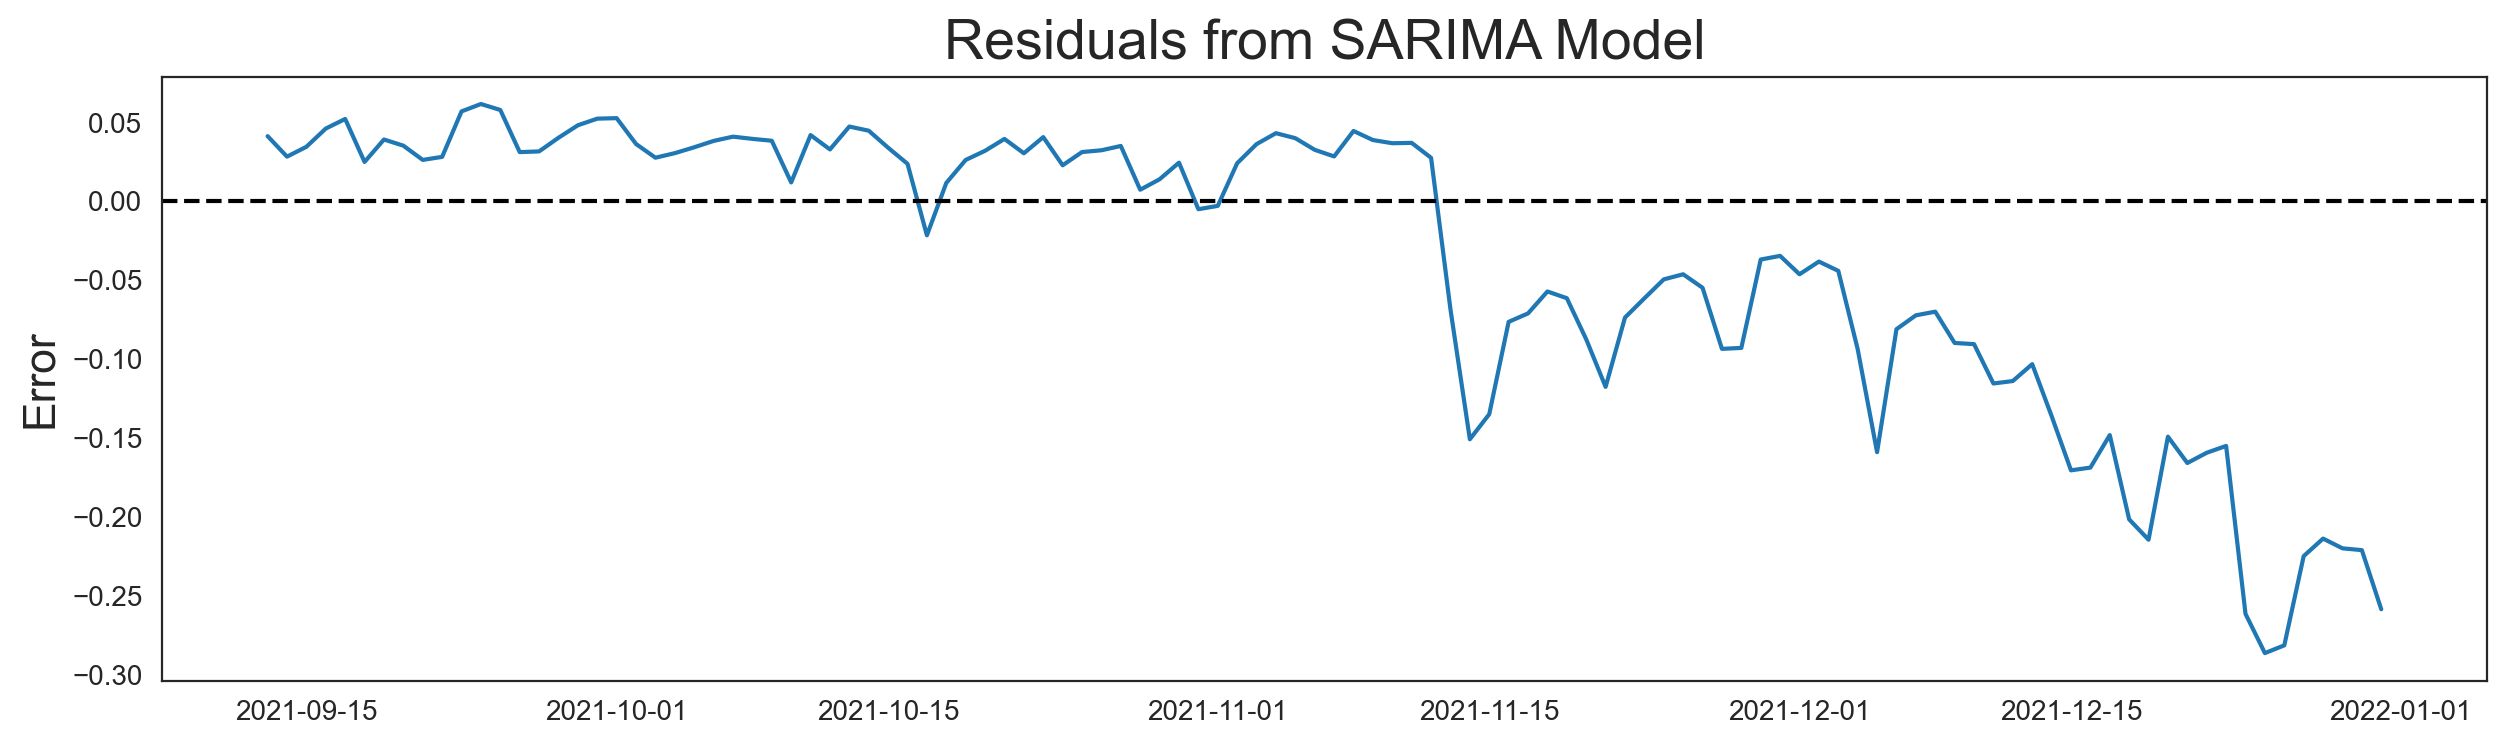

In [90]:
plt.plot(residuals)
plt.axhline(0, linestyle='--', color='k')
plt.title('Residuals from SARIMA Model', fontsize=20)
plt.ylabel('Error', fontsize=16);

In [91]:
print('Mean Absolute Percent Error:', round(np.mean(abs(residuals/test_data.Power)),4))

Mean Absolute Percent Error: 0.2584


In [92]:
print('Root Mean Squared Error:', np.sqrt(np.mean(residuals**2)))

Root Mean Squared Error: 0.09933605387248792


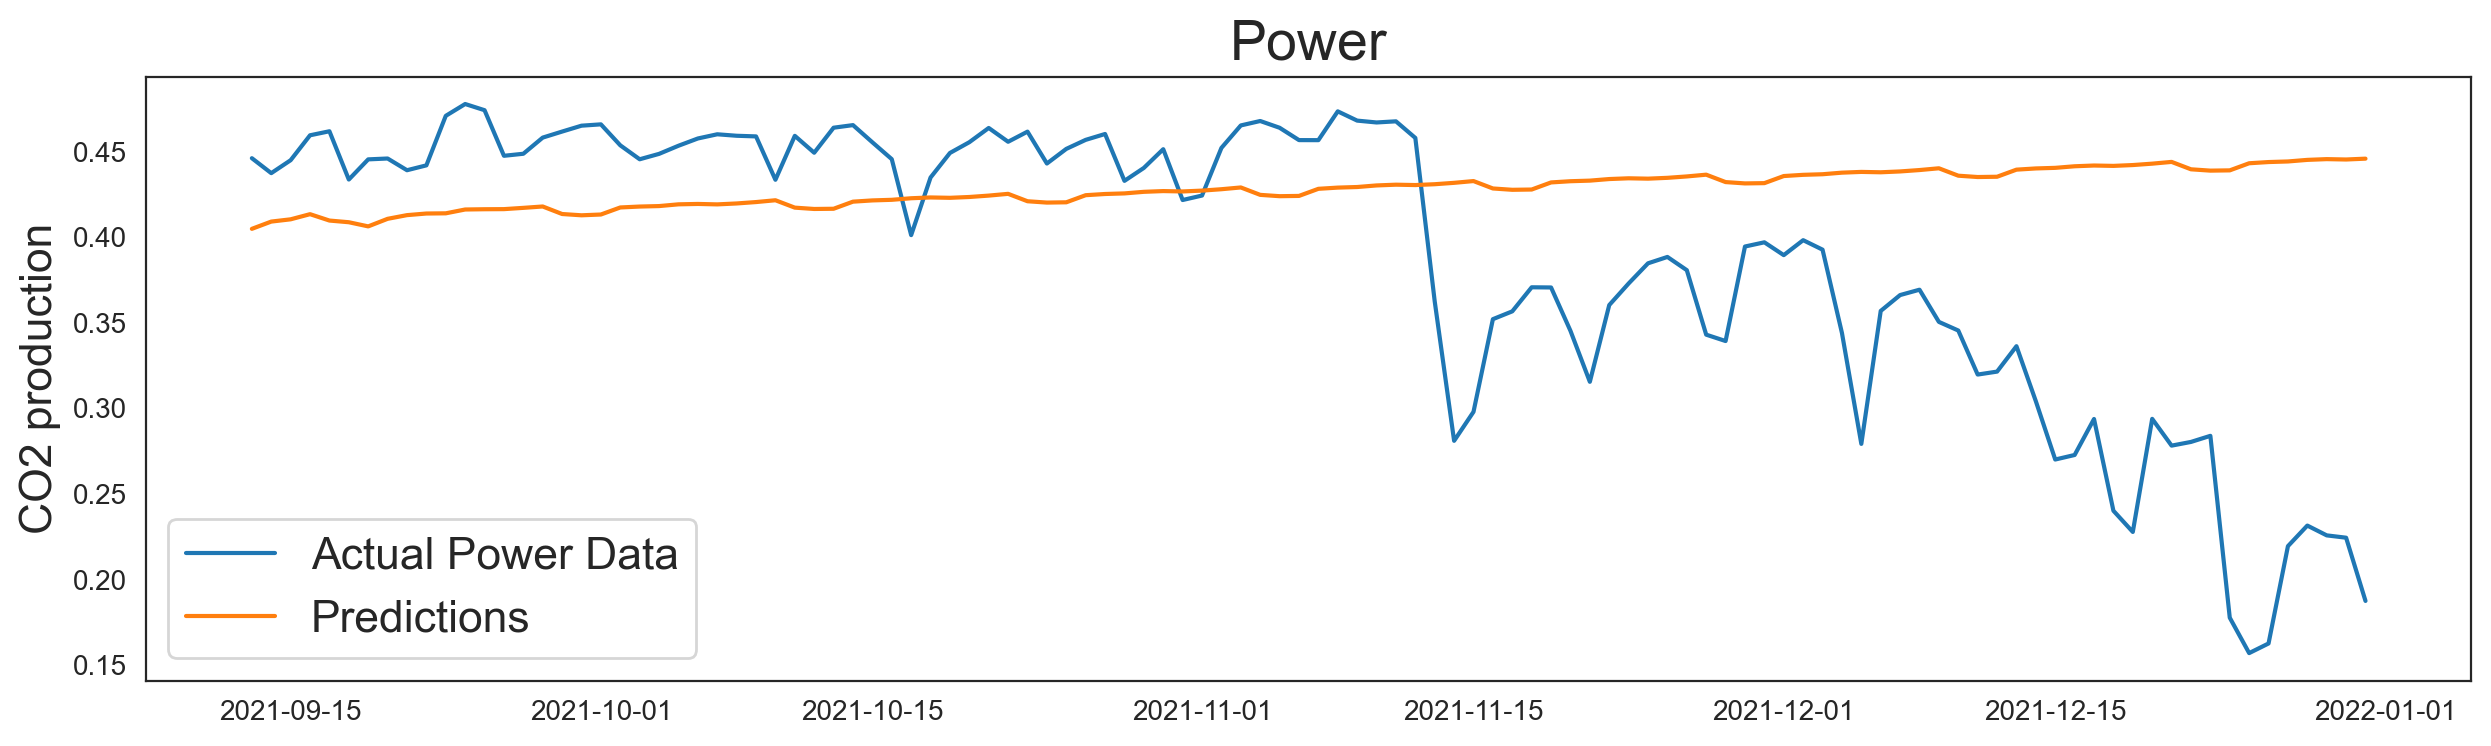

In [93]:

plt.plot(test_data)
plt.plot(predictions)

plt.legend(('Actual Power Data', 'Predictions'), fontsize=16)

plt.title('Power', fontsize=20)
plt.ylabel('CO2 production', fontsize=16);
# for year in range(start_date.year,end_date.year):
#     plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

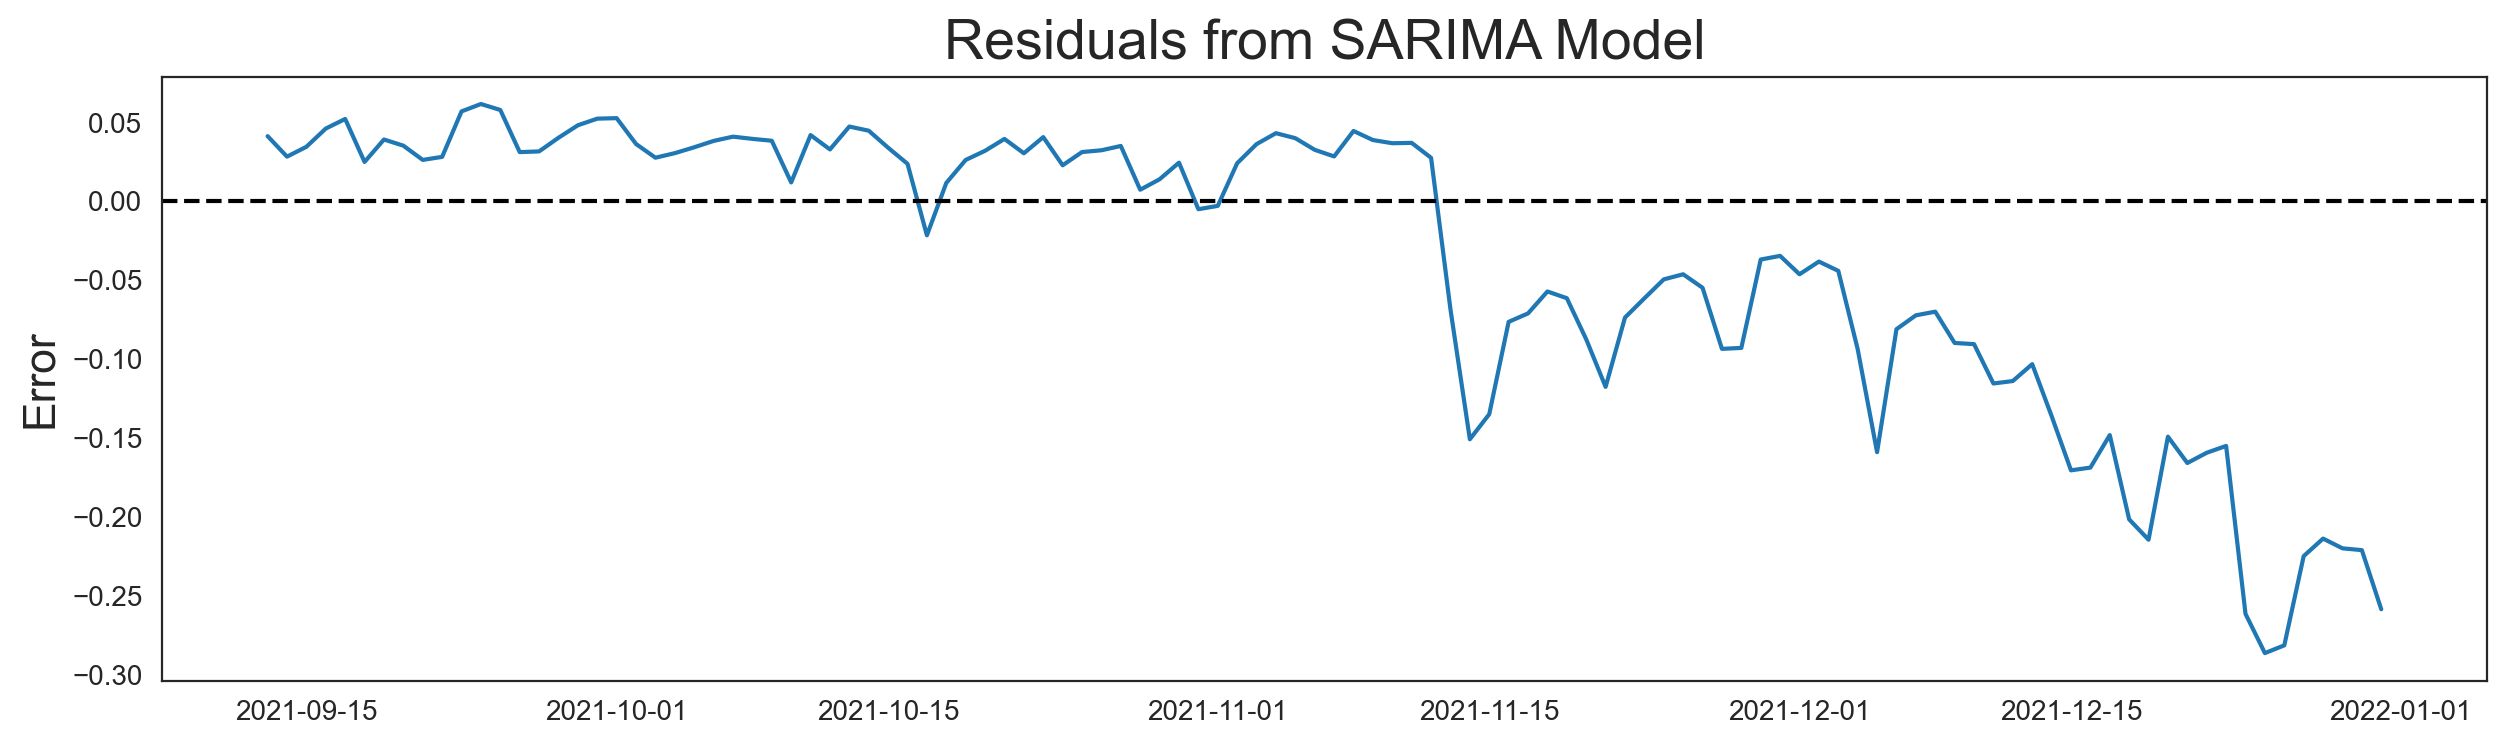

In [94]:
plt.plot(residuals)
plt.axhline(0, linestyle='--', color='k')
plt.title('Residuals from SARIMA Model', fontsize=20)
plt.ylabel('Error', fontsize=16);

In [131]:
rolling_predictions = test_data.copy()
for train_end in test_data.index:
    train_data = data.Power[:train_end-timedelta(days=1)]
    model = SARIMAX(train_data, order=my_order, seasonal_order=my_seasonal_order)
    model_fit = model.fit()
    pred = model_fit.forecast()
    rolling_predictions[train_end] = pred

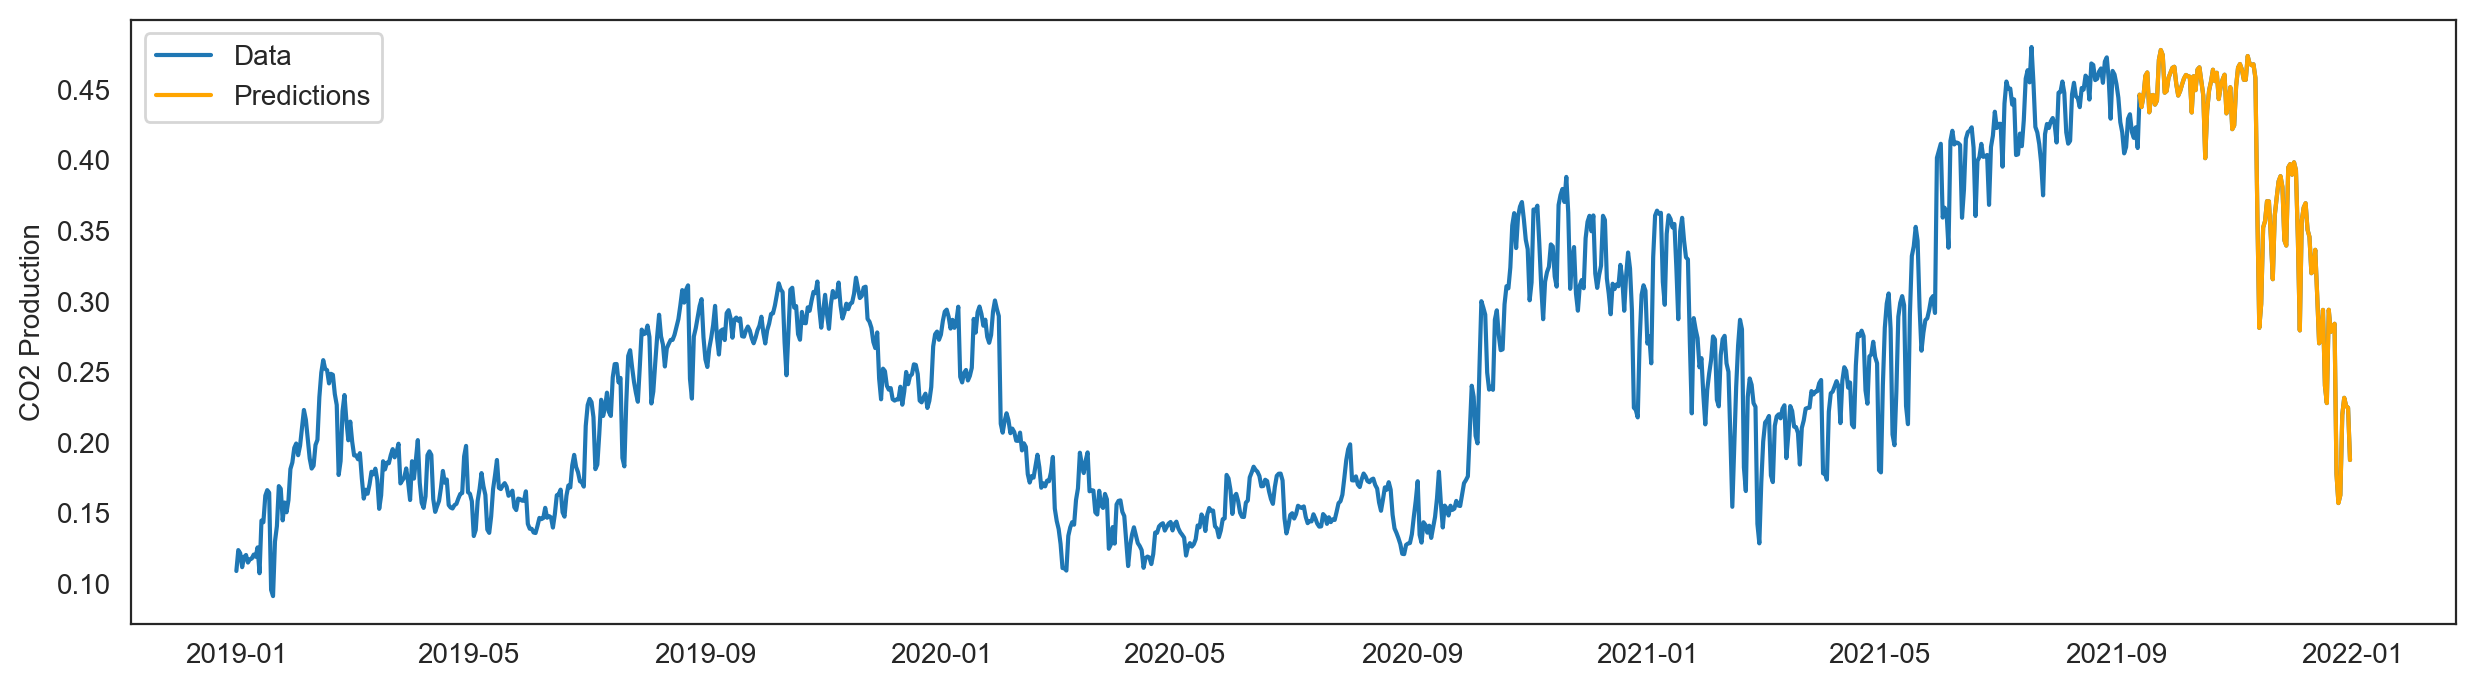

In [133]:
plt.plot(data.Power)
plt.plot(rolling_predictions, color="orange")
plt.legend(('Data', 'Predictions'),)
plt.ylabel('CO2 Production',)
plt.show();

In [176]:
# rolling_predictions = rolling_predictions.to_numpy()
list1=[]
for i in range(rolling_predictions.shape[0]):
    for j in range(1,rolling_predictions.shape[1]):
            if math.isnan(rolling_predictions[i,j]):
                continue
            else:
                list1.append(rolling_predictions[i,j])
list1 = np.array(list1)

In [188]:
rolling_residuals = test_data.to_numpy().flatten()-list1

In [191]:
print('Mean Absolute Percent Error:', round(np.mean(abs(rolling_residuals/test_data.to_numpy().flatten())),4))

Mean Absolute Percent Error: 0.0551


In [192]:
print('Root Mean Squared Error:', np.sqrt(np.mean(rolling_residuals**2)))

Root Mean Squared Error: 0.02714529274130179
